In [1]:
import nltk
from nltk.corpus import reuters, stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\faraz\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faraz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\faraz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faraz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
corpus_sentences = []
for fileid in reuters.fileids():
  raw_text = reuters.raw(fileid)
  tokenized_sentence = [word for word in nltk.word_tokenize(raw_text) if word.isalnum() and word not in stopwords.words('english')]
  corpus_sentences.append(tokenized_sentence)
print(f"Number of sentences in the Reuters corpus: {len(corpus_sentences)}")

Number of sentences in the Reuters corpus: 10788


In [4]:
model = Word2Vec(sentences=corpus_sentences, vector_size=100, window=5, min_count=5, workers=4)
# Print vocabulary size
print(f"Vocabulary size: {len(model.wv.index_to_key)}")

Vocabulary size: 12828


In [5]:
# Extract the learned word vectors and their corresponding words for visualization.
words = list(model.wv.index_to_key)[:200] # Limit to top 200 words for better visualization
word_vectors = np.array([model.wv[word] for word in words])

In [6]:
# Use t-SNE to project the high-dimensional word embeddings into a 2D space.
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)

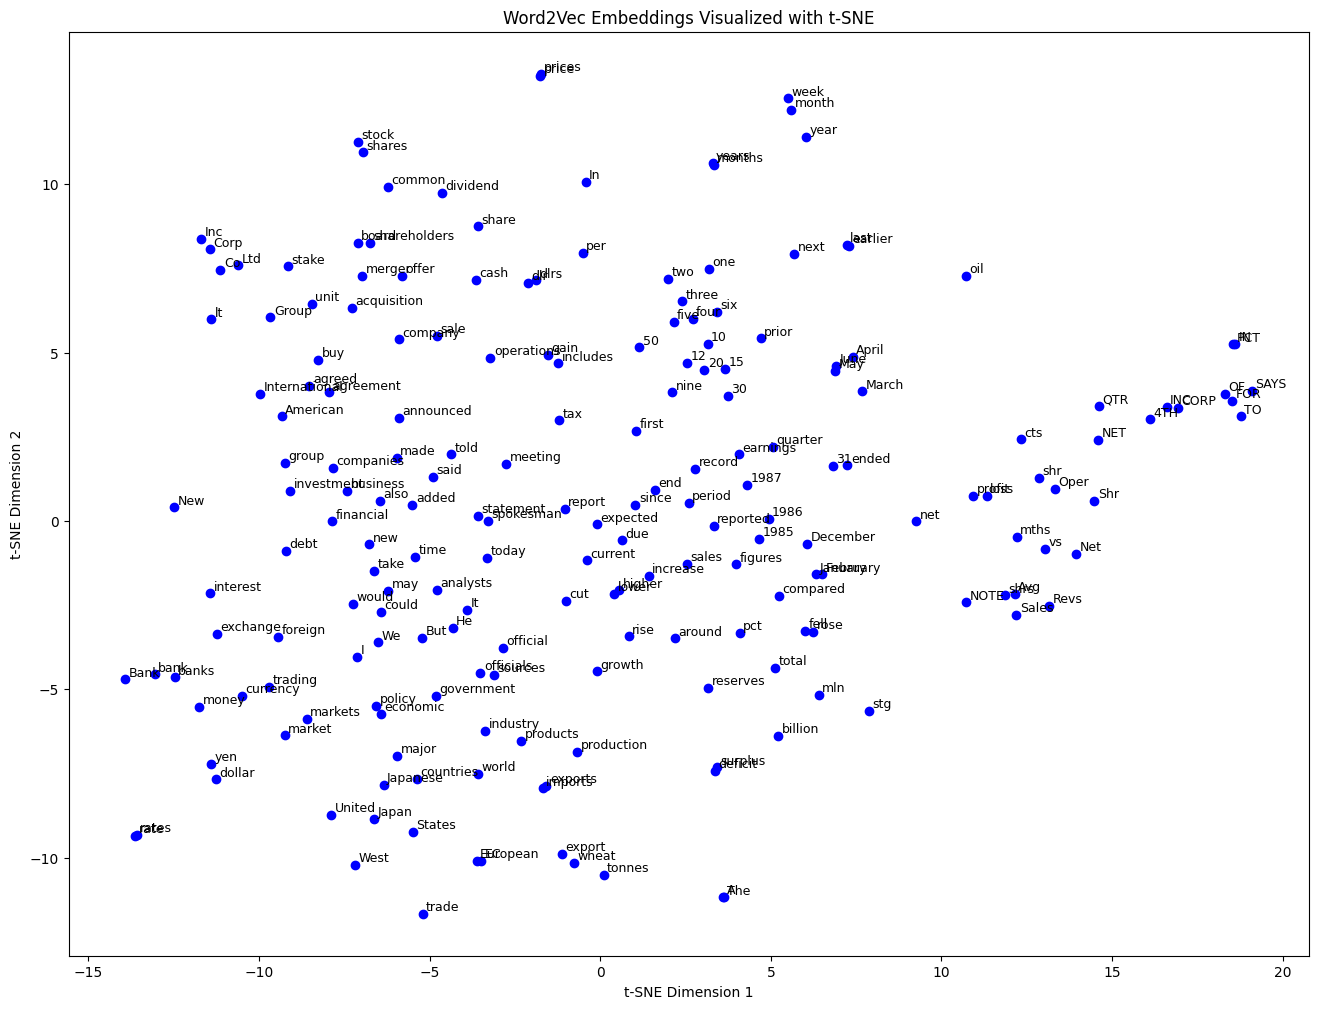

In [7]:
# Plot the 2D t-SNE visualization of the word embeddings with their labels.
def plot_embeddings(vectors, labels):
  plt.figure(figsize=(16, 12))
  for i, label in enumerate(labels):
    x, y = vectors[i]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.1, y + 0.1, label, fontsize=9)
  plt.title("Word2Vec Embeddings Visualized with t-SNE")
  plt.xlabel("t-SNE Dimension 1")
  plt.ylabel("t-SNE Dimension 2")
  plt.show()

plot_embeddings(word_vectors_2d, words)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_document_embedding(tokens, word2vec_model):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    
    if not word_embeddings:
        return None
    
    return np.mean(word_embeddings, axis=0)

def retrieve_documents(query, word2vec_model, corpus_sentences, top_n=5):
    query_tokens = [word for word in nltk.word_tokenize(query.lower()) 
                   if word.isalnum() and word not in stopwords.words('english')]
    
    query_embedding = get_document_embedding(query_tokens, word2vec_model)
    if query_embedding is None:
        return []
    
    similarities = []
    for doc_idx, doc_tokens in enumerate(corpus_sentences):
        doc_embedding = get_document_embedding(doc_tokens, word2vec_model)
        if doc_embedding is not None:
            similarity = cosine_similarity(query_embedding.reshape(1, -1), 
                                        doc_embedding.reshape(1, -1))[0][0]
            similarities.append((doc_idx, similarity))
    
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

In [ ]:
query = "Artificial Intelligence"
results = retrieve_documents(query, model, corpus_sentences)

print(f"\nTop {len(results)} documents for query: '{query}'\n")
for doc_idx, similarity in results:
    print(f"Document {doc_idx}")
    print(f"Similarity: {similarity:.4f}")
    print(f"Content: {' '.join(corpus_sentences[doc_idx][:50])}...")
    print()


Top 5 documents for query: 'Artificial Intelligence'

Document 6902
Similarity: 0.9097
Content: SENATOR LUGAR CALLS FOR CARGO PREFERENCE REPEAL The senior Republican Senate Agriculture Committee Richard Lugar Indiana called repeal cargo preference law aids American shipping industry said hurts farmers Cargo preference costly special interest operated expense American farmers dockworkers Lugar said signing cargo preference repeal legislation The law requires shipment goods...

Document 3477
Similarity: 0.9021
Content: PHILIPPINE COCONUT AGENCY GETS NEW ADMINISTRATOR Philippine Coconut Authority Chairman Jose Romero announced appointment lawyer Leandro Garcia administrator replacing Colonel Felix Duenas returning military duty The new constitution allow military men hold positions civilian agencies Duenas four military men assigned authority 1978 return ministry defence worked prior appointments coconut agency...

Document 7575
Similarity: 0.8975
Content: CARBIDE lt UK LOOKS TO ACQUISIT